# 1 Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [2]:
import warnings
import os
warnings.filterwarnings("ignore")

# 2 Read Data 

In [3]:
df = pd.read_csv(r"C:\Users\DELL-PC\Downloads\Mall_Customers.csv")
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df.shape

(200, 5)

# 3 Data Preparation

## 3.1 Missing Values

In [5]:
df.isnull().sum()/len(df)*100

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

##### There are no missing values  present in the dataset

## 3.2 Data types

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

#### All variables have the correct data type

## 3.3 Summary Statistics

In [7]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Statistics summary of Numeric Variables

In [8]:
df.describe(include='O')

Gender
count      200
unique       2
top     Female
freq       112

Statistics summary of categorical Variables

# 4 Exploratory  Data analysis (EDA)

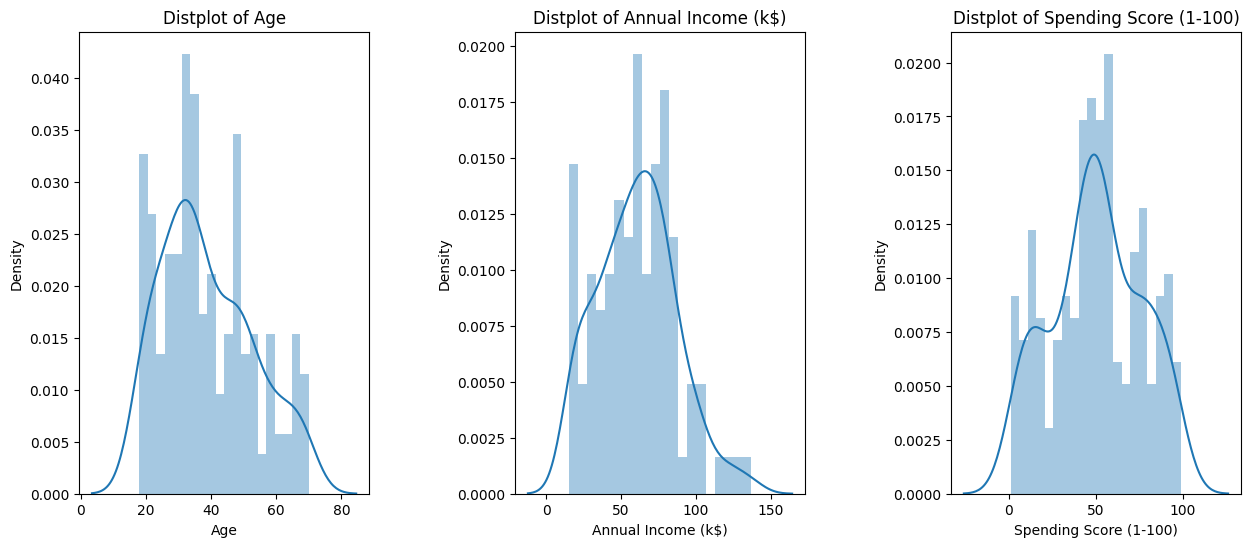

In [9]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

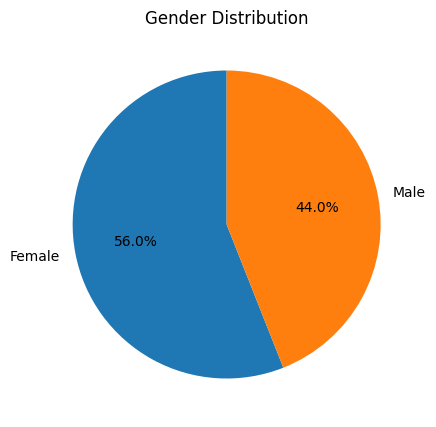

In [10]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Gender Distribution')

plt.show()


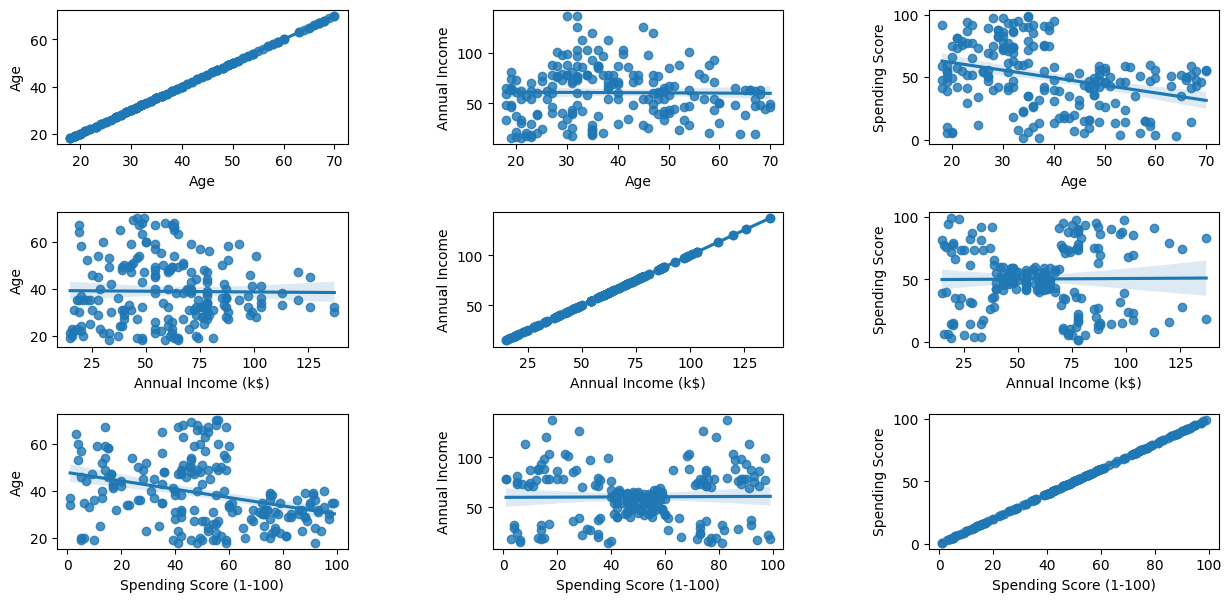

In [11]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

column: CustomerID


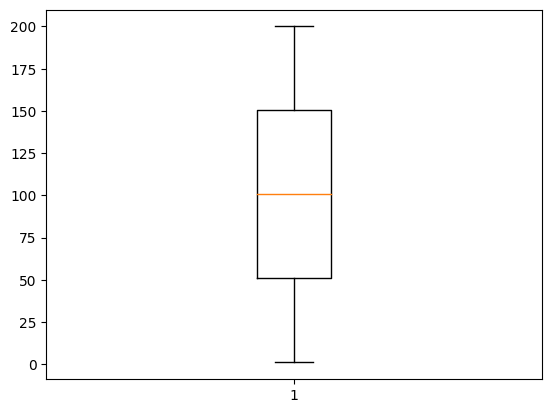

column: Age


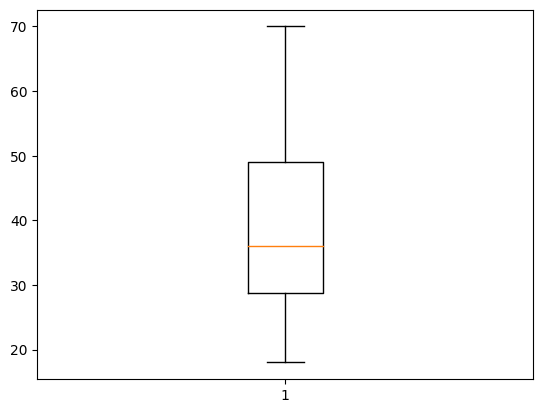

column: Annual Income (k$)


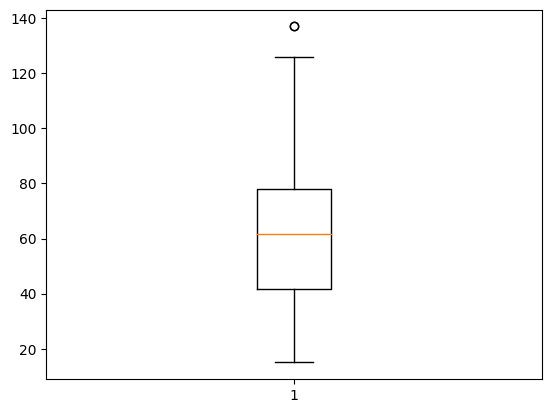

column: Spending Score (1-100)


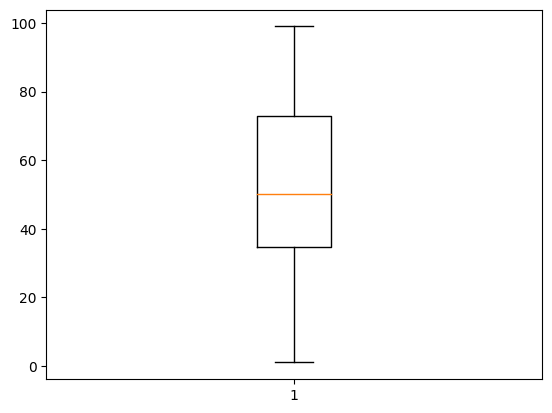

In [12]:
col = []
for k in df.columns:
    if df[k].dtype == 'int64' or  df[k].dtype == 'float':
        col.append(k)
for j in col:
    print("column:",j)
    plt.boxplot(df[j])
    plt.show()

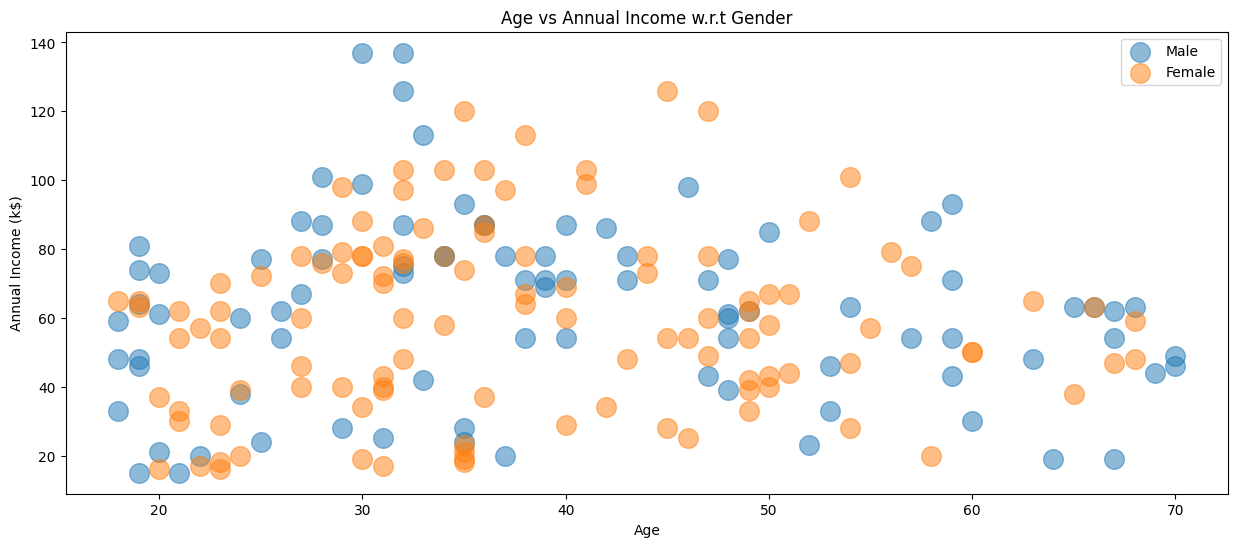

In [13]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

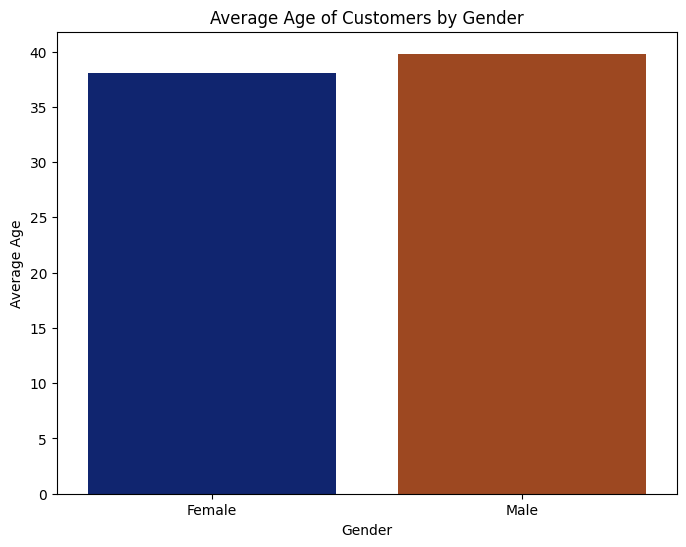

In [14]:
# Calculate average age for each gender
average_age_by_gender = df.groupby('Gender')['Age'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=average_age_by_gender, x='Gender', y='Age', palette='dark')
plt.title('Average Age of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

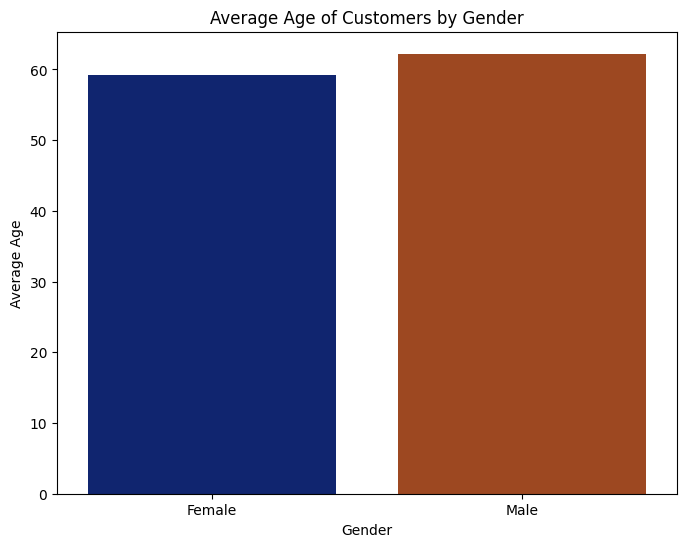

In [15]:
# Calculate average age for each gender
average_age_by_gender = df.groupby('Gender')['Annual Income (k$)'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=average_age_by_gender, x='Gender', y='Annual Income (k$)', palette='dark')
plt.title('Average Age of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

# K-mean Clustring  

In [16]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

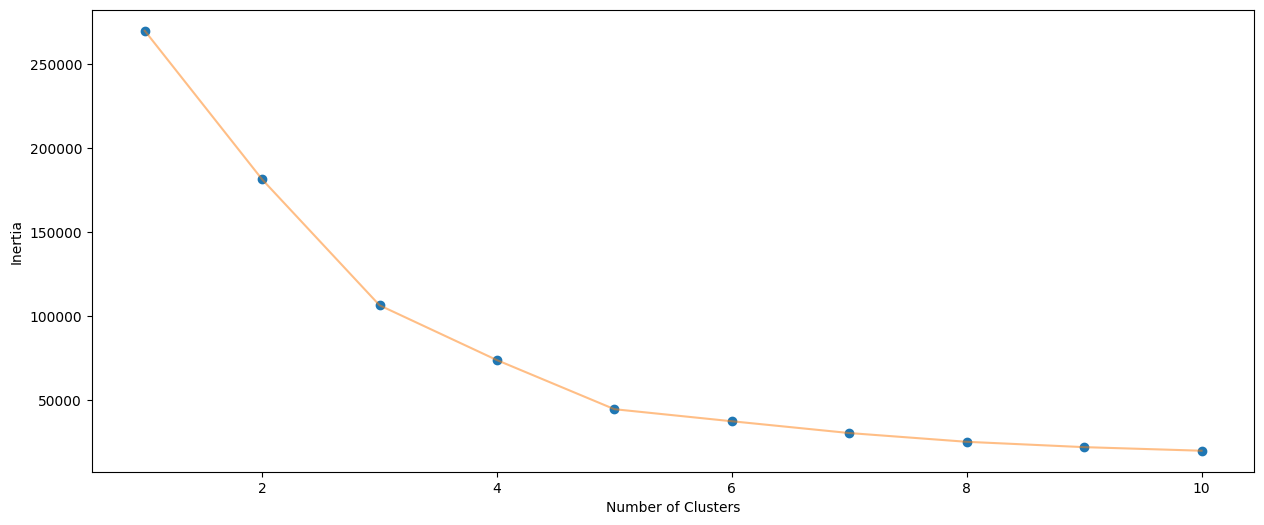

In [17]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [19]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

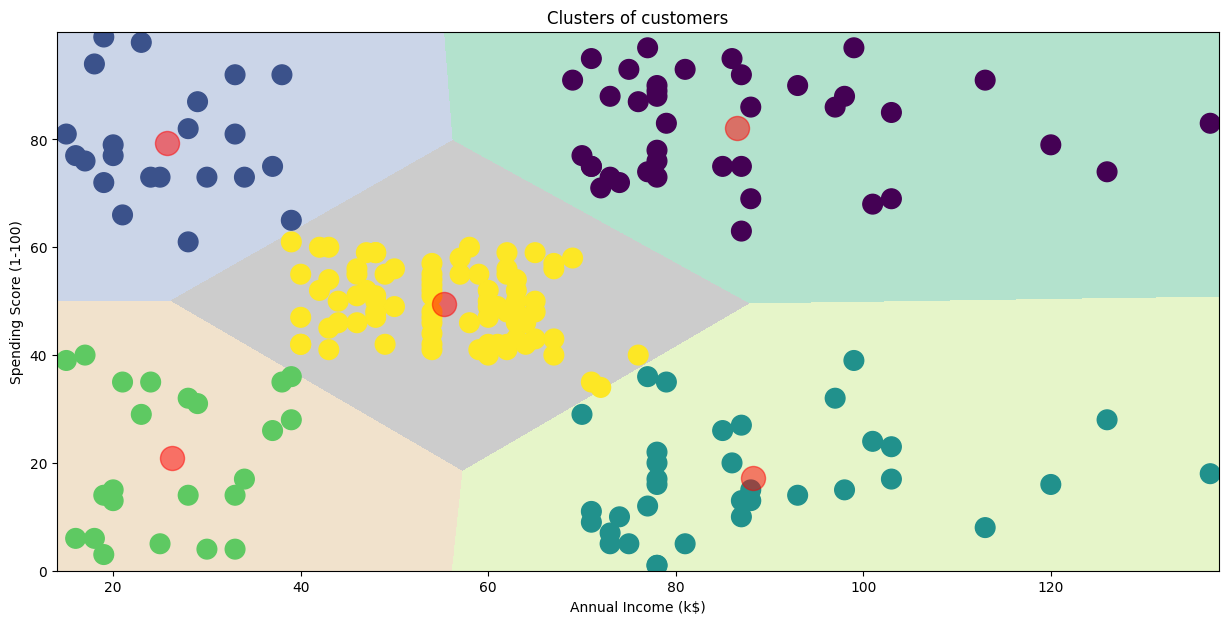

In [20]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.title('Clusters of customers')
plt.ylabel('Spending Score (1-100)') 
plt.xlabel('Annual Income (k$)')

plt.show()

# Hierarchical Clustering

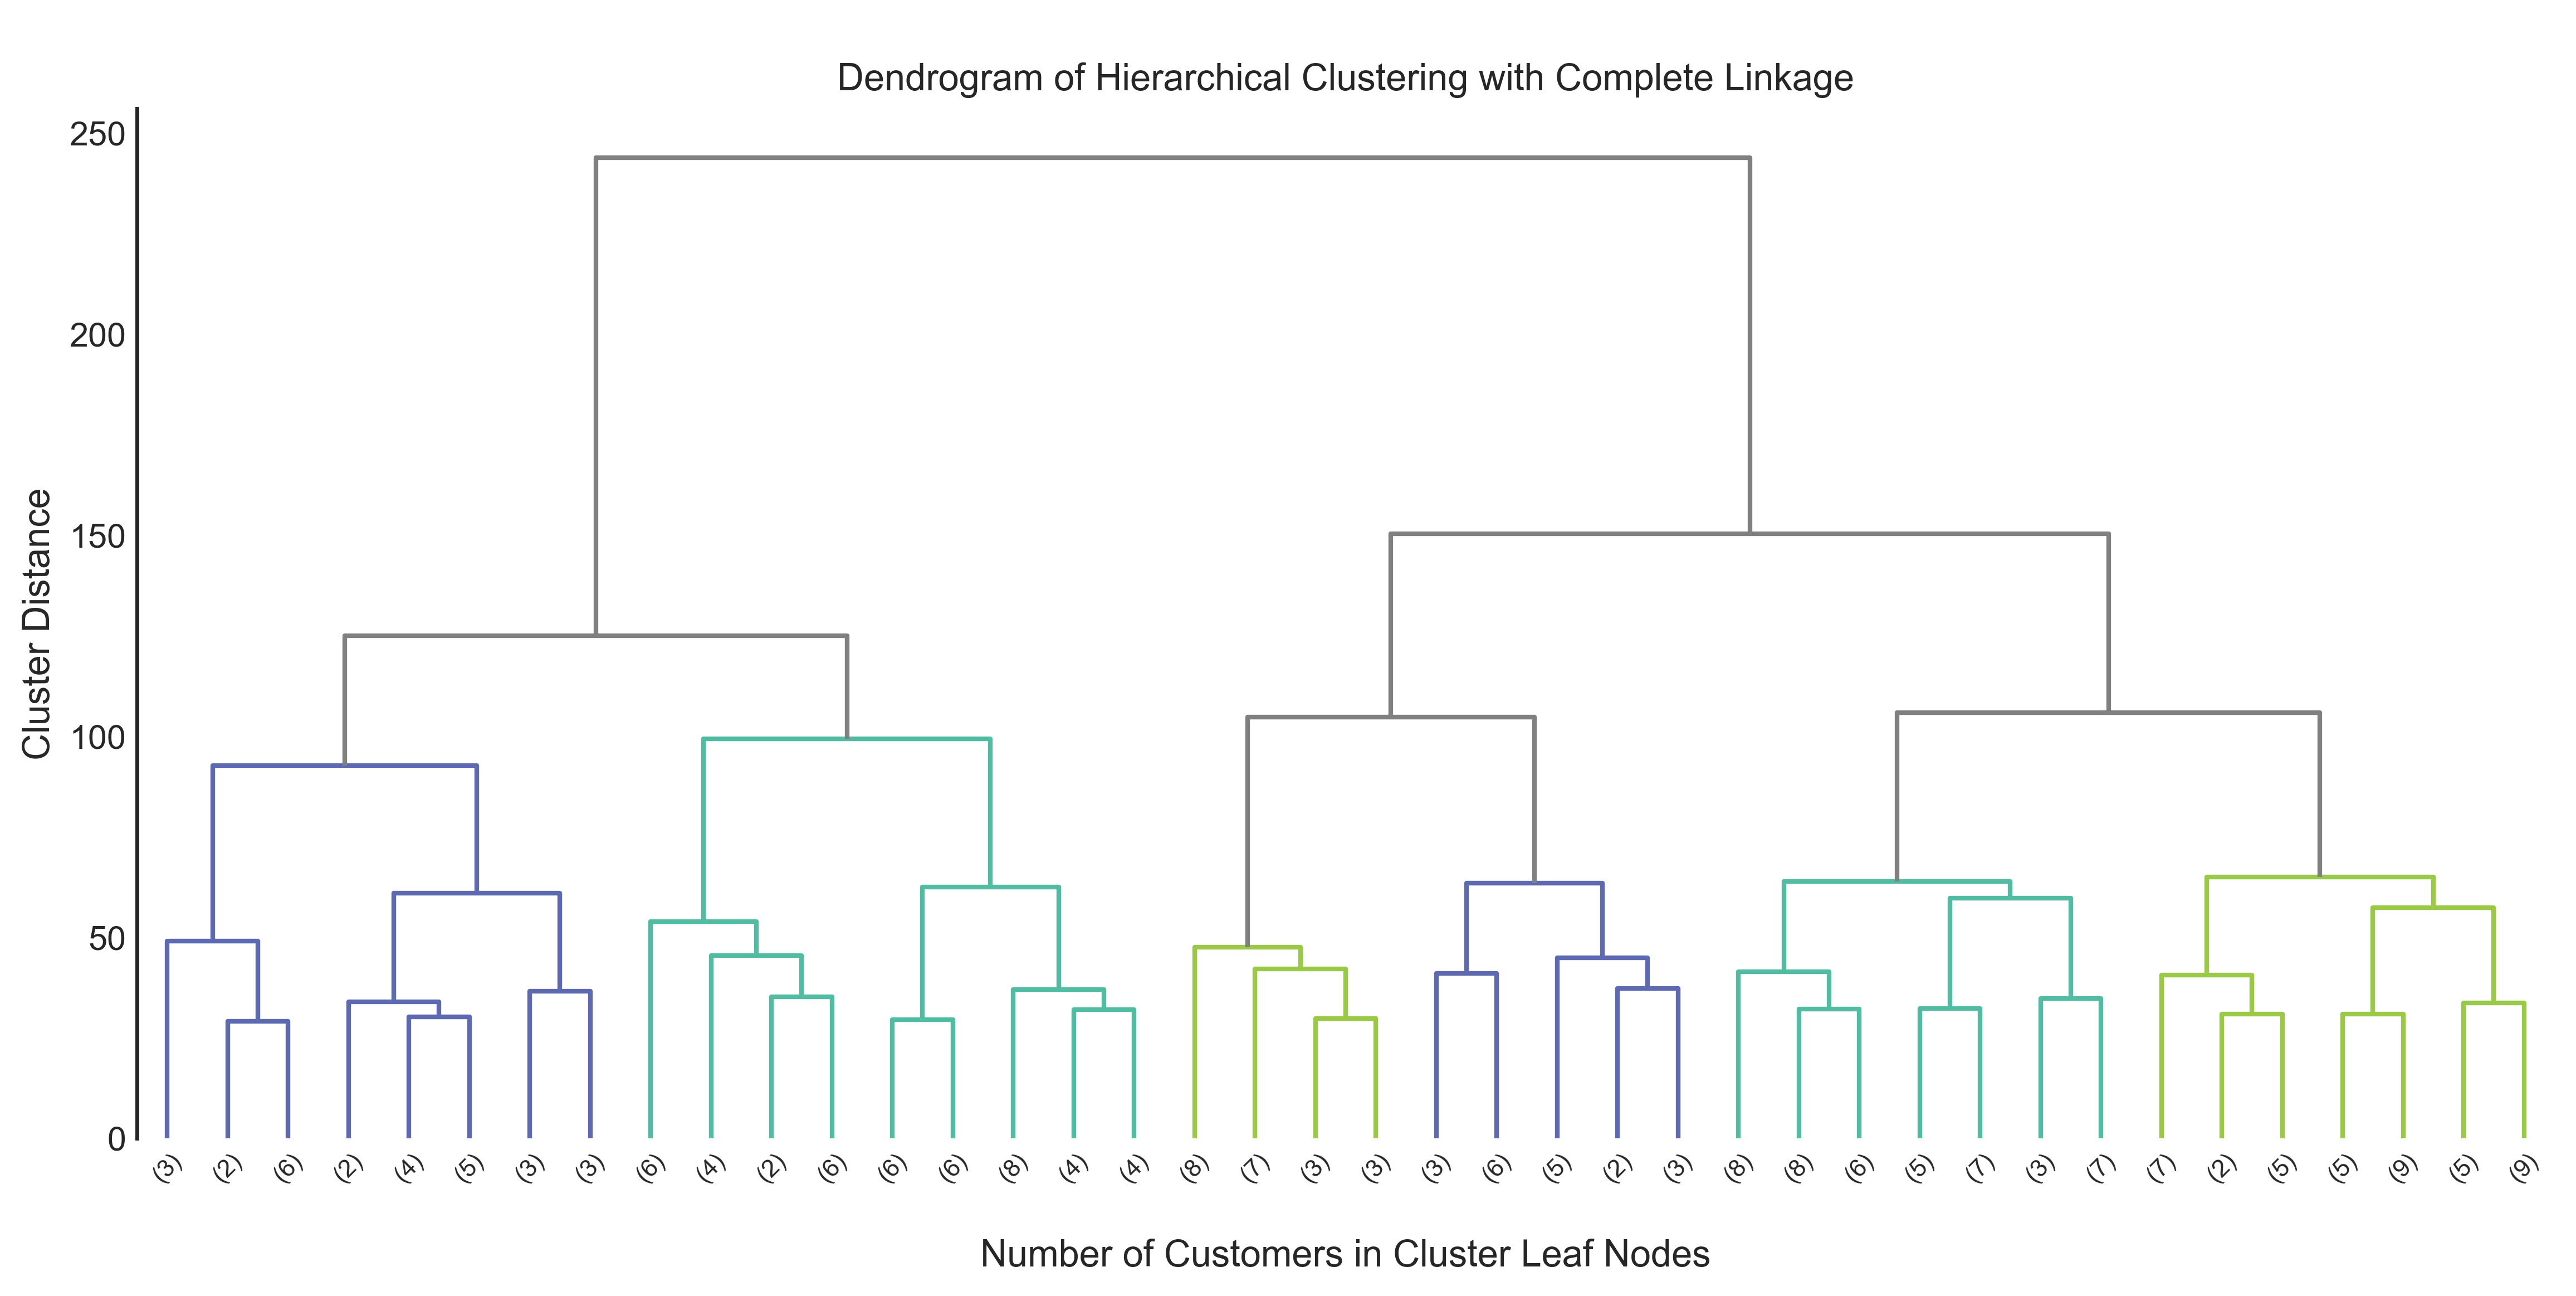

In [24]:
clust_df = df.copy()
clust_df['Gender'] = [1 if i == "Women" else 0 for i in clust_df.Gender]

sns.set(rc={'figure.dpi':400})
sns.set_context('notebook')
sns.set_style('ticks')

Z = hierarchy.linkage(clust_df, method='complete', metric='euclidean')
fig, ax = plt.subplots(figsize=(14,6))
hierarchy.set_link_color_palette(['#5d69b1', '#52bca3', '#99c945'])
den = hierarchy.dendrogram(Z, orientation='top', color_threshold=102,
                           p=40, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='grey')
#ax.axhline(101, color='grey', linestyle='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel('\nNumber of Customers in Cluster Leaf Nodes')
ax.set_ylabel('Cluster Distance')
ax.set_title('\nDendrogram of Hierarchical Clustering with Complete Linkage')
fig.show()

In [26]:
# Hierarchical clustering
import plotly.express as px
hc = AgglomerativeClustering(3, affinity='euclidean', linkage='complete', compute_full_tree=False)
hc_pred = hc.fit_predict(clust_df)
plot_hc=clust_df.copy()
plot_hc["Hierarchical Cluster"]=hc_pred
plot_hc=plot_hc.sort_values(by='Hierarchical Cluster')
plot_hc['Hierarchical Cluster'] = plot_hc['Hierarchical Cluster'].astype(str)

# Plot of clusters                                               
fig = px.scatter(plot_hc, x="Spending Score (1-100)", y="Annual Income (k$)", color="Hierarchical Cluster",
                 color_discrete_sequence=px.colors.qualitative.Vivid[1:])
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout( title="Hierarchical Cluster Profiles,<br>Customer Spending vs. Income", 
                  width=700, legend_title = 'Cluster',
                  xaxis=dict(title='Spending Score',showline=True, zeroline=False), 
                  yaxis=dict(title='Income, $',ticksuffix='k',showline=True))
fig.show()